<a href="https://colab.research.google.com/github/nabilaalifia/Analysis-of-Signal-to-Noise-Ratio-and-Bit-Error-Rate-Parameters/blob/main/link_optic_Nabila_Herman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Nabila Herman(1101184066)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:

#Parameter-parameter yang dibutuhkan dalam perhitungan
R = 0.85 #Responsifitas
B = 15*10**9 #nilai bandwidth 
F = 1 #faktor gain 
K_boltzman = 1.38*10**-23 #konstanta boltzman
T = 310 #suhu dalam kelvin
RL = 50 #resistansi ekuivalen
SM = 3 #safety margin
M = -0.3 #tambahan daya sinyal
q_coulomb = 1.6*10**-19 #konstantas Coulomb
id = 90*10**-9 #dark current(Ampere)


#Fungsi untuk mengonversi numerik ke logaritmik atau sebaliknya
NtL = lambda x : 10*np.log10(x)
LtN = lambda x : 10**(x/10)

#Parameter dalam perhitungan Prx
#jarak dari sentral ke ODC = 16 km
#jarak dari ODC ke ODP = 10 km
#jarak dari ODP ke ONU =  5*17 = 85 m (nomor urut presensi = 17) dengan 5 merupakan jarak asumsi setiap lantai
#jarak total = 16000 + 10000 + 85 = 10045 m

d = np.arange(0.85, 26.086, 1) #jarak dalam satuan km
L_fiber = 0.36 #loss berdasarkan jenis fiber G657A2 (db)
N_splicer = 7 #jumlah splicer
L_splicer = 0.3 #loss dari splicer (db)
N_connector = 5 #jumlah konektor
L_connector = 0.3 #loss dari konektor (db)
L_splitter = 16 + 19 #redaman splitter 1:16 + redaman 1:32
Pt = 50 #daya kirim dari transmitter (dBm)







In [10]:
#fungsi untuk perhitungan daya terima di receiver (Prx)
def P_rx():
  hambatan_fiber = d * L_fiber
  hambatan_splicer = N_splicer * L_splicer
  hambatan_connector = N_connector * L_connector

  alfa_total = hambatan_fiber + hambatan_splicer + hambatan_connector + L_splitter + SM 
  Pr= Pt - alfa_total
  return Pr

Pr = P_rx()
print("Daya Terima adalah ", Pr)

Daya Terima adalah  [ 8.094  7.734  7.374  7.014  6.654  6.294  5.934  5.574  5.214  4.854
  4.494  4.134  3.774  3.414  3.054  2.694  2.334  1.974  1.614  1.254
  0.894  0.534  0.174 -0.186 -0.546 -0.906]


In [4]:
#fungsi untuk perhitungan arus primer
def arus_primer():
  Pr_num = LtN(Pr)
  ip = Pr_num * R
  return ip
ip = arus_primer()
print("besarnya arus primer adalah ", ip)

besarnya arus primer adalah  [5.48048415 5.04450928 4.64321641 4.27384656 3.93386023 3.62091997
 3.33287423 3.06774266 2.82370242 2.59907568 2.3923181  2.20200817
 2.02683748 1.86560169 1.71719227 1.58058889 1.45485237 1.33911824
 1.23259081 1.13453768 1.04428473 0.96121143 0.88474665 0.81436467
 0.74958161 0.68995208]


In [14]:
#fungsi untuk perhitungan signal power

def signal_power():
  Is_square = (ip*M)**2
  return Is_square
Is_square = signal_power()
print("signal power sebesar ", Is_square)

signal power sebesar  [2.70321358 2.29023665 1.94035128 1.6439188  1.39277307 1.17999553
 0.99972456 0.84699405 0.71759658 0.6079675  0.51508673 0.4363956
 0.36972631 0.31324227 0.26538744 0.22484351 0.19049359 0.16139139
 0.13673521 0.11584582 0.09814775 0.08315347 0.0704499  0.05968708
 0.05056853 0.04284305]


In [6]:
#fungsi untuk perhitungan SNR
def SNR():
  BDC = 2*q_coulomb*id*B*(M**2)*F #Bandwidth dark current
  SN = 2*q_coulomb*ip*B*(M**2)*F #Shot Noise
  NT = (4*K_boltzman*T*B)/RL #Noise thermal
  Signal = Is_square
  Noise = BDC + SN + NT

  SNR = Signal / Noise 
  SNR_dbm = NtL(SNR)
  return SNR_dbm

SNR = SNR()
print("SNR = ", SNR )


SNR =  [90.5663702  90.20555818 89.84467615 89.48371809 89.12267747 88.7615472
 88.40031958 88.03898625 87.67753815 87.31596545 86.95425746 86.59240263
 86.23038839 85.86820113 85.50582607 85.14324723 84.78044724 84.4174073
 84.05410705 83.69052441 83.32663548 82.96241439 82.59783314 82.23286142
 81.86746646 81.50161283]


In [7]:
#Q formula
def Q_rumus():
  Q_rumus = 0.5 * (10**(SNR/50))
  return Q_rumus
Q = Q_rumus()
print("nilai Q = ",Q)


nilai Q =  [32.38153323 31.84792691 31.32301275 30.80664231 30.29866922 29.7989491
 29.30733954 28.82370002 28.34789186 27.87977813 27.41922363 26.9660948
 26.52025967 26.0815878  25.64995017 25.2252192  24.80726861 24.39597336
 23.99120962 23.59285467 23.20078684 22.81488543 22.43503065 22.06110353
 21.69298588 21.33056018]


In [12]:
#fungsi untuk menghitung BER
import math as m
pe_list = []
def BER_rumus():
  z = 1/(Q * m.sqrt(2*m.pi))
  for i in range (len(Q)):
    pe = m.exp(-(Q[i]**2)/2)
    pe_list.append(pe)
  BER = (1/z)*(pe_list)
  return BER
BER = BER_rumus()
print(BER)


[1.64692603e-226 4.48537442e-219 6.99900094e-212 6.37260067e-205
 3.44599474e-198 1.12578527e-191 2.25904760e-185 2.82929251e-179
 2.24616863e-173 1.14744356e-167 3.82690272e-162 8.45065596e-157
 1.25246042e-151 1.26235716e-146 8.76346505e-142 4.24227025e-137
 1.44921155e-132 3.53421261e-128 6.22210416e-124 7.99405318e-120
 7.57414584e-116 5.34618695e-112 2.83900063e-108 1.14506304e-104
 3.54027240e-101 8.46567495e-098]


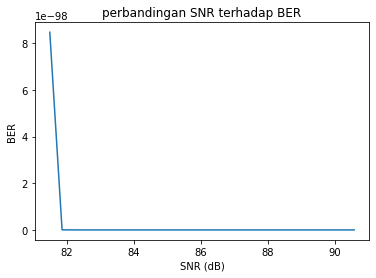

In [13]:
def graph_SNR_terhadap_BER():
  plt.figure()
  plt.plot(SNR, BER)
  plt.title("perbandingan SNR terhadap BER")
  plt.xlabel("SNR (dB)")
  plt.ylabel("BER")
  plt.show()

graph_SNR_terhadap_BER()

